Import Libraries

In [5]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
#Import the data
df=pd.read_csv("Customer Churn.csv")
#see the dataFrame
df
#see the first five data from the DataFrame
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [16]:
#see the info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Replaced blank values with zero(0) as tenure is zero(0) and no total charges are recorded

In [36]:
df["TotalCharges"]=df["TotalCharges"].replace(" ","0")
df["TotalCharges"]=df["TotalCharges"].astype("float")

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
# df.isnull().sum().sum()
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [52]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [56]:
# df.duplicated()
df.duplicated().sum()

0

In [60]:
df["customerID"].duplicated().sum()

0

In [92]:
def conv(value):
    if value==1:
        return "yes"
    else:
        return "no"

df['SeniorCitizen']=df['SeniorCitizen'].apply(conv)
    

In [94]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Converted 0 and 1 values of senior citizen to yes/no to make it easier to understand

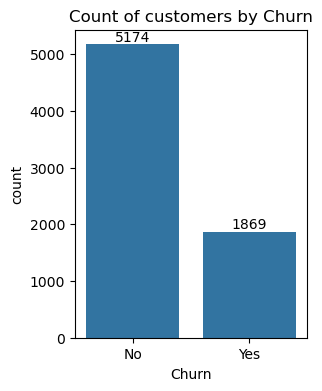

In [84]:
#What is the percentage of customers who have stopped using our churned
plt.figure(figsize=(3,4))
ax=sns.countplot(x="Churn",data=df)
ax.bar_label(ax.containers[0])
plt.title("Count of customers by Churn")
plt.show()

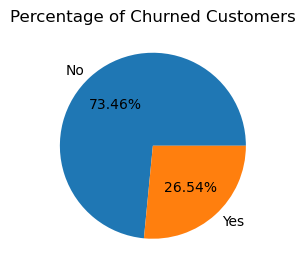

,Churn
Churn,
No,5174
Yes,1869


In [66]:
plt.figure(figsize=(3,4))
gb=df.groupby("Churn").agg({'Churn':"count"})
plt.pie(gb['Churn'],labels=gb.index,autopct="%1.2f%%")
plt.title("Percentage of Churned Customers")
plt.show()
gb

IN the Above Chart we Can see that 26.54% of out Customers have Churned out 
Now let's explore the reason behind it

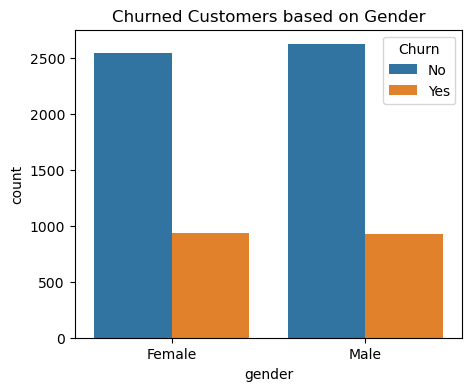

In [88]:
plt.figure(figsize=(5,4))
sns.countplot(x="gender",data=df,hue="Churn")
plt.title("Churned Customers based on Gender")
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_1340\2833914746.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x="SeniorCitizen",data=df,palette="Set1")


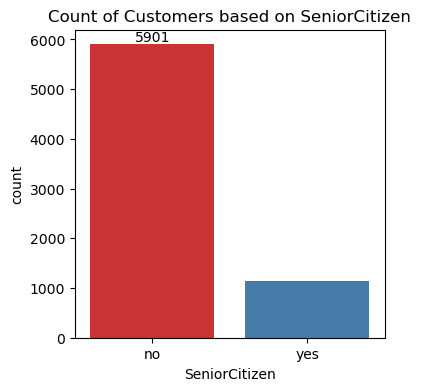

In [132]:
plt.figure(figsize=(4,4))
ax=sns.countplot(x="SeniorCitizen",data=df,palette="Set1")
ax.bar_label(ax.containers[0])
plt.title("Count of Customers based on SeniorCitizen")
plt.show()

<Figure size 400x400 with 0 Axes>

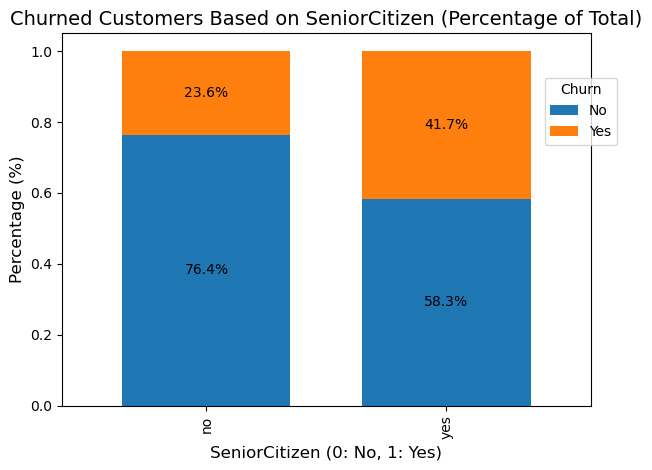

In [148]:
# Step 1: Create a cross-tabulation of SeniorCitizen vs Churn
df_counts = pd.crosstab(df['SeniorCitizen'], df['Churn'], normalize='index')  # Normalize by row to get percentages

# Step 2: Plot the stacked bar chart
plt.figure(figsize=(4, 4))

ax = df_counts.plot(kind='bar', stacked=True, width=0.7)

# Step 3: Add percentage labels to the bars
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height * 100:.1f}%', 
                    (p.get_x() + p.get_width() / 2., p.get_y() + height / 2.),
                    ha='center', va='center', 
                    fontsize=10, color='black')

# Step 4: Customize plot labels and title
plt.title("Churned Customers Based on SeniorCitizen (Percentage of Total)", fontsize=14)
plt.xlabel("SeniorCitizen (0: No, 1: Yes)", fontsize=12)
plt.ylabel("Percentage (%)", fontsize=12)
plt.legend(title='Churn',bbox_to_anchor=(0.9,0.9))
#Show the plot
plt.tight_layout()
plt.show()

In the above charts we can see that comparatively a greater percentage of people in 
Senior Citizen have churned

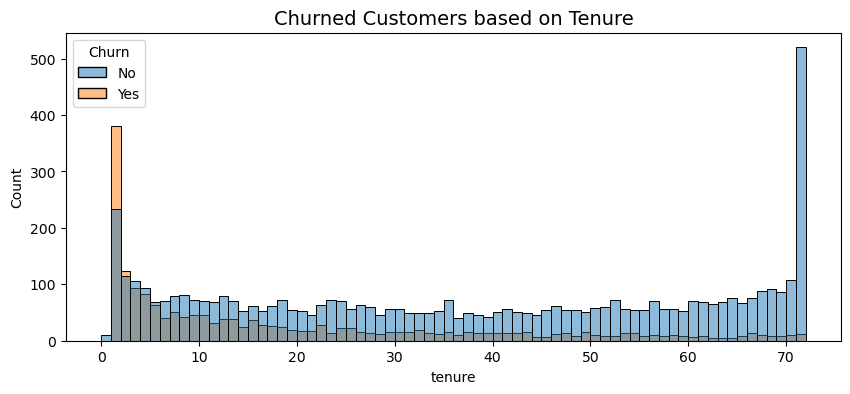

In [178]:
plt.figure(figsize=(10,4))
sns.histplot(x='tenure',data=df,bins=72,hue="Churn")
plt.title("Churned Customers based on Tenure",fontsize=14)
plt.show()

People who have used our services for a long time have stayed and people who have used our services 1 or 2 months have churned 

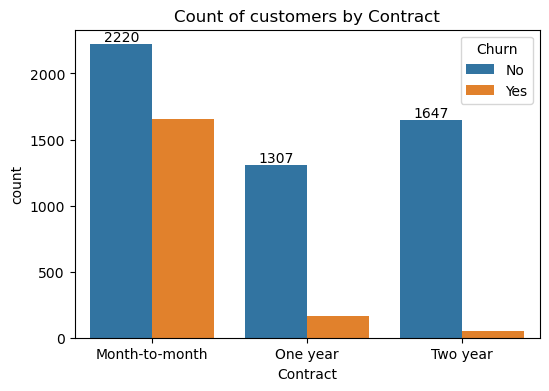

In [188]:
plt.figure(figsize=(6,4))
ax=sns.countplot(x='Contract',data=df,hue="Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of customers by Contract")
plt.show()

In the above chart we can see that people who take month to month plan are likely to churn than from who those have 1 or 2 years contract

In [194]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

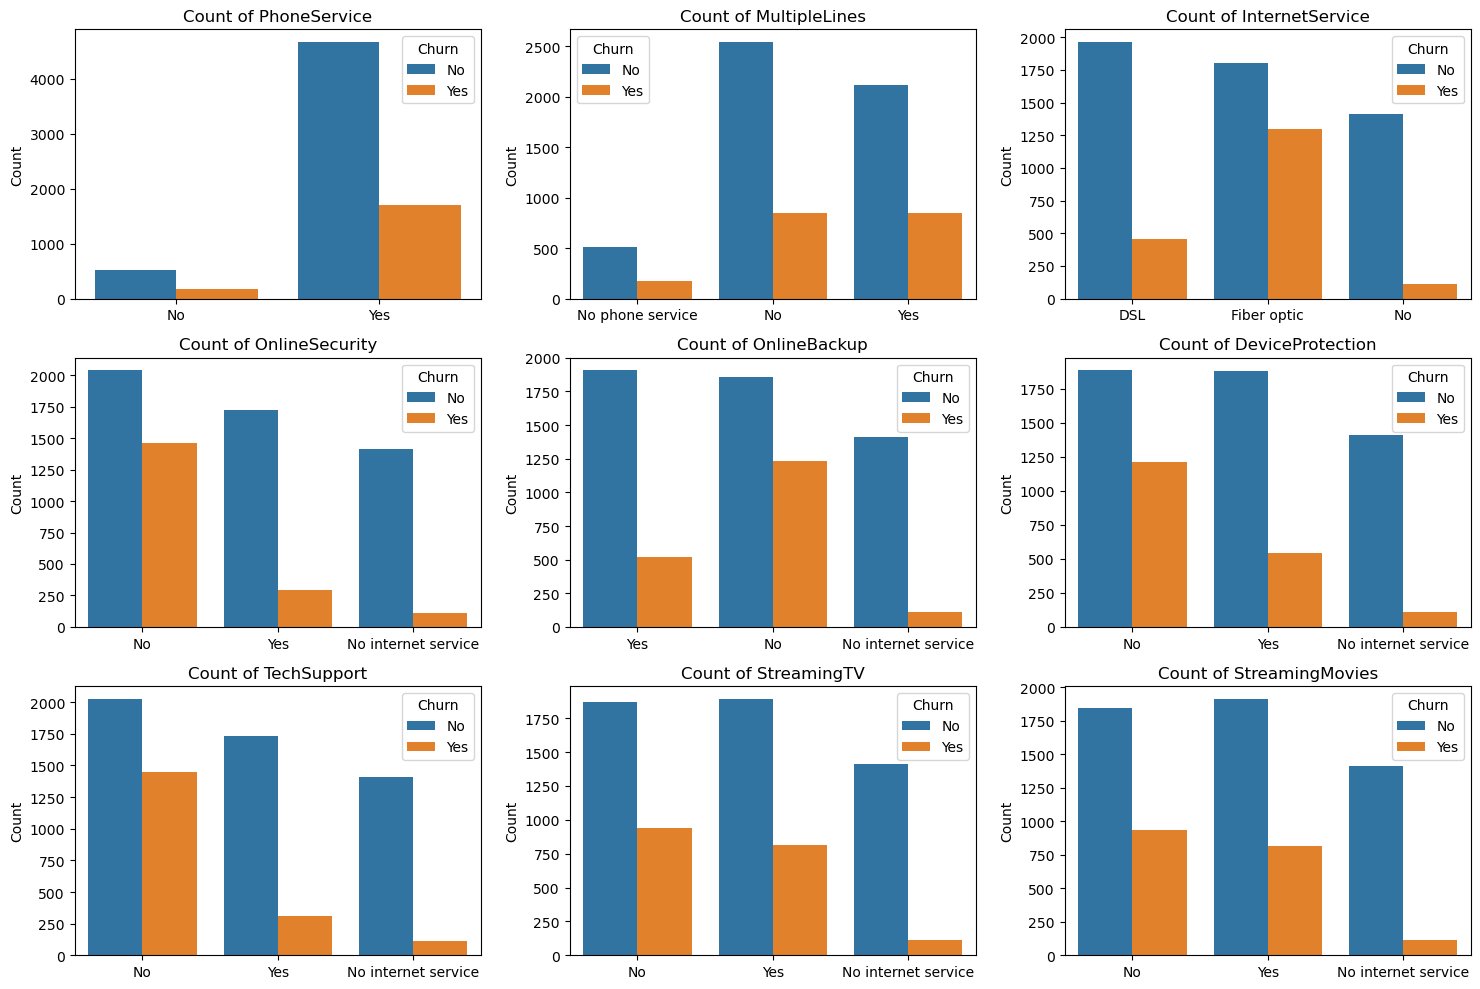

In [200]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of columns to create count plots for
columns = ['PhoneService', 'MultipleLines', 'InternetService', 
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
           'TechSupport', 'StreamingTV', 'StreamingMovies']

# Number of subplots (rows and columns)
n = len(columns)
ncols = 3  # You can adjust this to control the number of columns in your subplot grid
nrows = (n // ncols) + (n % ncols)  # Calculate the number of rows required

# Create a matplotlib figure with subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 10))

# Flatten the axes array to make indexing easier
axes = axes.flatten()

# Loop through each column and create a countplot
for i, col in enumerate(columns):
    sns.countplot(x=col, data=df, ax=axes[i],hue=df['Churn'])
    axes[i].set_title(f'Count of {col}', fontsize=12)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')

# Remove any unused axes (if nrows * ncols > len(columns))
for j in range(i + 1, len(axes)):
    axes[j].axis('off')  # Hide any extra subplots

# Adjust layout to avoid overlapping
plt.tight_layout()

# Show the plot
plt.show()

Customers with no internet or phone services tend to have lower churn rates. Features like Online Security, Device Protection, and Tech Support show higher churn among non-subscribers. In contrast, services like StreamingTV and StreamingMovies show comparable churn between users and non-users.

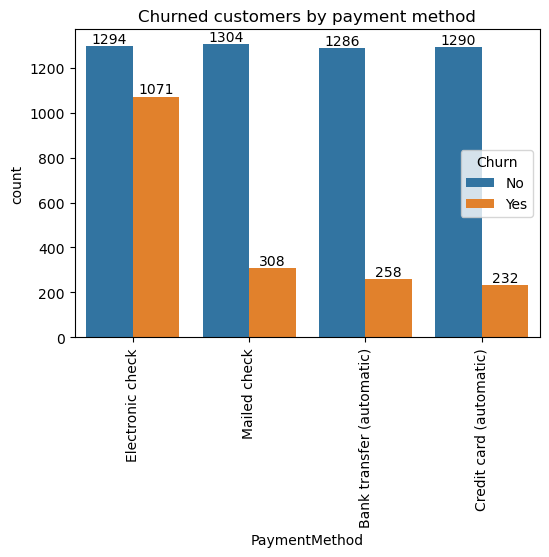

In [39]:
plt.figure(figsize=(6,4))
ax=sns.countplot(x="PaymentMethod", data=df, hue="Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.xticks(rotation=90)
plt.title("Churned customers by payment method")
plt.show()

the proportion of churned customers is higher for electronic check and mailed check compared to bank transfer and credit card (automatic). This suggests that customers using electronic check or mailed check are more likely to churn.